<a href="https://colab.research.google.com/github/rickylukman/Machine-Learning/blob/master/Machine_Learning_Clustering_Alvianda_Ricky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import File 

In [0]:
import pandas as pd

#read data gdrive disimpan di variable df
df=pd.read_csv('used_cars.csv')
df.shape

(20001, 26)

In [0]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


# Missing Value

In [0]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


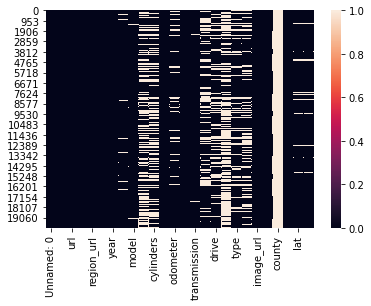

In [0]:
import seaborn as sns
ax = sns.heatmap(df.isna())

In [0]:
# Melihat jumlah data setiap kolom
print(df.isnull().sum())

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64


**Menghapus kolom yang tidak diperlukan**

In [0]:
df = df.drop(["Unnamed: 0","id","url", "region","region_url","cylinders","odometer","vin","size","type","image_url","description","county","lat","long"], axis = 1)

In [0]:
df.shape

(20001, 11)

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,17899,2012.0,volkswagen,golf r,excellent,gas,clean,manual,4wd,black,ut
1,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
2,46463,2015.0,gmc,sierra 1500,excellent,gas,clean,automatic,4wd,white,ut
3,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
4,49999,2018.0,ford,f-450,NaN,diesel,clean,automatic,4wd,white,ut


**Cek data kosong/null**

In [0]:
df[df.isnull().any(axis=1)]

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
1,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
3,0,2016.0,ford,f-150,excellent,gas,clean,automatic,4wd,NaN,ut
4,49999,2018.0,ford,f-450,NaN,diesel,clean,automatic,4wd,white,ut
5,13999,2009.0,ram,NaN,NaN,gas,clean,automatic,4wd,silver,ut
6,34500,2017.0,ford,f-350,NaN,diesel,clean,automatic,4wd,white,ut
...,...,...,...,...,...,...,...,...,...,...,...
19996,49999,2016.0,ram,cummin 2500 laramie,NaN,diesel,clean,automatic,4wd,grey,wa
19997,12127,2018.0,nissan,sentra,NaN,gas,clean,automatic,fwd,NaN,wa
19998,0,2019.0,jeep,grand cherokee limited,NaN,gas,clean,automatic,4wd,NaN,wa
19999,14661,2017.0,toyota,corolla,NaN,gas,clean,automatic,fwd,NaN,wa


In [0]:
# Jumlah data kosong untuk setiap kolom
print(df.isnull().sum())

price              0
year              12
manufacturer     705
model            265
condition       9152
fuel              73
title_status     110
transmission     190
drive           4642
paint_color     5514
state              0
dtype: int64


In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
paint_color      object
state            object
dtype: object

**Handling missing value untuk type int dan float**



In [0]:
# Untuk Missing value bertipe int dan float, mengisinya dengan mean (rata-rata) nilai
df.year.fillna(df.year.mean(),inplace=True)

In [0]:
df.describe()

,price,year
count,2.000100e+04,20001.000000
mean,7.664058e+04,2009.830657
std,8.335762e+06,7.911238
min,0.000000e+00,1917.000000
25%,3.970000e+03,2007.000000
50%,8.795000e+03,2011.000000
75%,1.749500e+04,2015.000000
max,1.172420e+09,2020.000000


**Handling missing value untuk type object**

In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
paint_color      object
state            object
dtype: object

In [0]:
print(len(df['manufacturer'].unique()))
# df.manufacturer.value_counts()
df["manufacturer"].fillna("ford", inplace = True)

41


In [0]:
print(len(df['model'].unique()))
# df.model.value_counts()
df["model"].fillna("f-150", inplace = True)

4145


In [0]:
print(len(df['condition'].unique()))
# df.condition.value_counts()
df["condition"].fillna("excellent", inplace = True)

7


In [0]:
print(len(df['fuel'].unique()))
# df.fuel.value_counts()
df["fuel"].fillna("gas", inplace = True)

6


In [0]:
print(len(df['title_status'].unique()))
# df.title_status.value_counts()
df["title_status"].fillna("clean", inplace = True)

7


In [0]:
print(len(df['transmission'].unique()))
df.transmission.value_counts()
df["transmission"].fillna("automatic", inplace = True)

4


In [0]:
print(len(df['drive'].unique()))
# df.drive.value_counts()
df["drive"].fillna("4wd", inplace = True)

4


In [0]:
print(len(df['paint_color'].unique()))
# df.paint_color.value_counts()
df["paint_color"].fillna("white", inplace = True)

13


In [0]:
print(df.isnull().sum())

price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
title_status    0
transmission    0
drive           0
paint_color     0
state           0
dtype: int64


In [0]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
fuel             object
title_status     object
transmission     object
drive            object
paint_color      object
state            object
dtype: object

# Encode object to int/float

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
df['manufacturer'] = encoder.fit_transform(df['manufacturer'])
df['model'] = encoder.fit_transform(df['model'])
df['condition'] = encoder.fit_transform(df['condition'])
df['fuel'] = encoder.fit_transform(df['fuel'])
df['title_status'] = encoder.fit_transform(df['title_status'])
df['transmission'] = encoder.fit_transform(df['transmission'])
df['drive'] = encoder.fit_transform(df['drive'])
df['paint_color'] = encoder.fit_transform(df['paint_color'])
df['state'] = encoder.fit_transform(df['state'])

In [0]:
df.dtypes

price             int64
year            float64
manufacturer      int64
model             int64
condition         int64
fuel              int64
title_status      int64
transmission      int64
drive             int64
paint_color       int64
state             int64
dtype: object

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,17899,2012.0,38,2197,0,2,0,1,0,0,0
1,0,2016.0,12,1764,0,2,0,0,0,10,0
2,46463,2015.0,13,3285,0,2,0,0,0,10,0
3,0,2016.0,12,1764,0,2,0,0,0,10,0
4,49999,2018.0,12,1843,0,0,0,0,0,10,0


# Normalisasi

In [0]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df = pd.DataFrame(norm.fit_transform(df))
df.columns = ['price','year','manufacturer','model','condition','fuel','title_status','transmission','drive','paint_color','state']

# Korelasi antar data

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

<function matplotlib.pyplot.yticks>

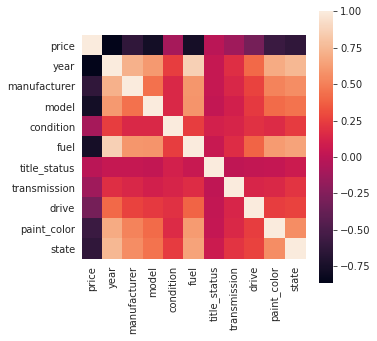

In [0]:
ambil = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
plt.figure(figsize=(5, 5))
ax = sns.heatmap(ambil, vmax=1, square=True)
plt.xticks
plt.yticks

In [0]:
ambil

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
price,1.000000,-0.863927,-0.625674,-0.767579,-0.094181,-0.757673,-0.009833,-0.124441,-0.308154,-0.579383,-0.623870
year,-0.863927,1.000000,0.721438,0.607299,0.244024,0.865217,0.043851,0.181082,0.415462,0.693645,0.747828
manufacturer,-0.625674,0.721438,1.000000,0.446040,0.154302,0.594822,0.041729,0.144062,0.271809,0.514001,0.558153
model,-0.767579,0.607299,0.446040,1.000000,0.152343,0.590212,0.028770,0.097596,0.228497,0.419131,0.453840
condition,-0.094181,0.244024,0.154302,0.152343,1.000000,0.243563,0.111390,0.131833,0.197622,0.166668,0.241007
fuel,-0.757673,0.865217,0.594822,0.590212,0.243563,1.000000,0.047094,0.171787,0.393422,0.616275,0.655799
title_status,-0.009833,0.043851,0.041729,0.028770,0.111390,0.047094,1.000000,0.015087,0.026807,0.035012,0.073048
transmission,-0.124441,0.181082,0.144062,0.097596,0.131833,0.171787,0.015087,1.000000,0.134352,0.152440,0.208715
drive,-0.308154,0.415462,0.271809,0.228497,0.197622,0.393422,0.026807,0.134352,1.000000,0.249392,0.271451
paint_color,-0.579383,0.693645,0.514001,0.419131,0.166668,0.616275,0.035012,0.152440,0.249392,1.000000,0.560273


# Outlier detection


<Figure size 10000x10000 with 0 Axes>

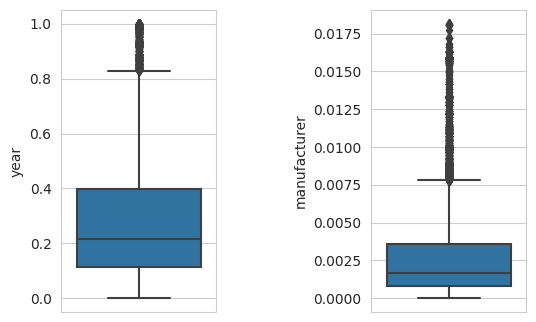

In [0]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["year"], ax=axes[0])
sns.boxplot(y=df["manufacturer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,0.986428,0.110883,0.002094,0.121078,0.0,0.000110,0.0,0.000055,0.0,0.000000,0.0
1,0.000000,0.752564,0.004480,0.658493,0.0,0.000747,0.0,0.000000,0.0,0.003733,0.0
2,0.996578,0.043219,0.000279,0.070459,0.0,0.000043,0.0,0.000000,0.0,0.000214,0.0
3,0.000000,0.752564,0.004480,0.658493,0.0,0.000747,0.0,0.000000,0.0,0.003733,0.0
4,0.998509,0.040301,0.000240,0.036806,0.0,0.000000,0.0,0.000000,0.0,0.000200,0.0


In [0]:
df.count()

price           20001
year            20001
manufacturer    20001
model           20001
condition       20001
fuel            20001
title_status    20001
transmission    20001
drive           20001
paint_color     20001
state           20001
dtype: int64

# Clustering

Ambil 2 kolom untuk clustering

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [0]:
df.head()

,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,0.986428,0.110883,0.002094,0.121078,0.0,0.000110,0.0,0.000055,0.0,0.000000,0.0
1,0.000000,0.752564,0.004480,0.658493,0.0,0.000747,0.0,0.000000,0.0,0.003733,0.0
2,0.996578,0.043219,0.000279,0.070459,0.0,0.000043,0.0,0.000000,0.0,0.000214,0.0
3,0.000000,0.752564,0.004480,0.658493,0.0,0.000747,0.0,0.000000,0.0,0.003733,0.0
4,0.998509,0.040301,0.000240,0.036806,0.0,0.000000,0.0,0.000000,0.0,0.000200,0.0


In [0]:
# Mengambil year dan manufacture sebagai data yang ingin dikelompokkan
print(df.iloc[:, [1, 2]])
cluster = df.iloc[:, [1, 2]].values

           year  manufacturer
0      0.110883      0.002094
1      0.752564      0.004480
2      0.043219      0.000279
3      0.752564      0.004480
4      0.040301      0.000240
...         ...           ...
19996  0.040273      0.000639
19997  0.158722      0.002281
19998  0.672141      0.006325
19999  0.135788      0.002491
20000  0.055994      0.001026

[20001 rows x 2 columns]


Cari nilai K menggunakan elbow method distortion

In [0]:
from matplotlib import pyplot as plt
import numpy as np

distortions = []
K = range(1,10)
for i in K:
  kmeanModel = KMeans(n_clusters=i).fit(cluster)
  kmeanModel.fit(cluster)
  distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /cluster.shape[0] ) 

<function matplotlib.pyplot.show>

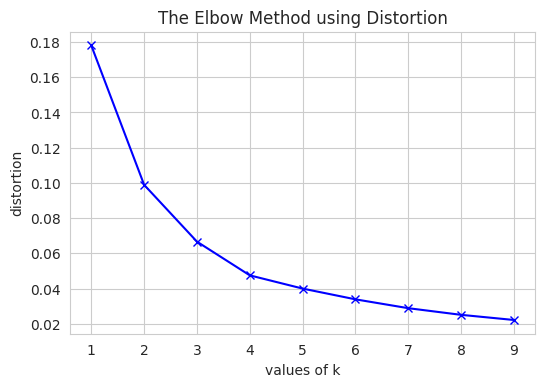

<Figure size 500x500 with 0 Axes>

In [0]:
#plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('values of k')
plt.ylabel('distortion')
plt.title('The Elbow Method using Distortion')
fig = plt.figure(figsize=(5, 5))
plt.show

In [0]:
cluster.shape

(20001, 2)

In [0]:
import math

## Nilai K = 2

In [0]:
# Inisiasi nilai K
K = 2

In [0]:
# manufacturer dan paint color untuk data yang akan di cluster
cluster = df.iloc[:, [1, 2]].values

Plot sebaran data

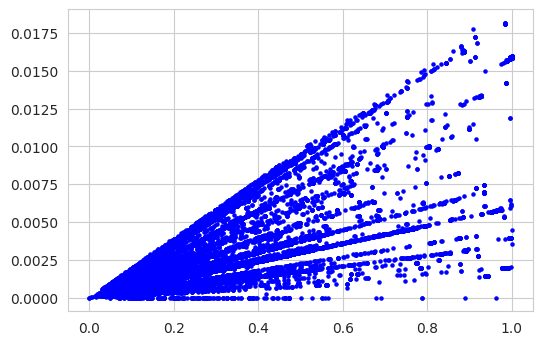

In [0]:
import matplotlib.pyplot as plt
plt.scatter(cluster[ : , 0], cluster[ :, 1], s = 5, c = 'b')
plt.show()

In [0]:
# Inisiasi kolom yang dipakai 
dx = cluster[ : , 0].tolist()
dy = cluster[ : , 1].tolist()
print(max(dx))
print(max(dy))

0.9999750015687108
0.018158637138596657


In [0]:
# Menggabungkan data kolom manufacture dan paint_color
titik = list(zip(dx, dy))

In [0]:
import random

In [0]:
def cekcentroid(centroid1,centroid2): 
  cobax = random.uniform(0,1)
  cobay = random.uniform(0,0.0182)
  if (cobax!=centroid1[0]) and (cobay!=centroid1[1]) and (centroid2==0):
    centroid2 = [cobax,cobay]
    return centroid2

In [0]:
cobax = random.uniform(0,1)
cobay = random.uniform(0,0.0182)
centroid1 = [cobax,cobay]
centroid2 = cekcentroid(centroid1,0)
# centroid3 = cekcentroid(centroid1,centroid2)
print(centroid1)
print(centroid2)
# print(centroid3)

[0.8656546445825793, 0.010592542961164405]
[0.03178364602764594, 1.2987690437715728e-05]


Text(0, 0.5, 'year')

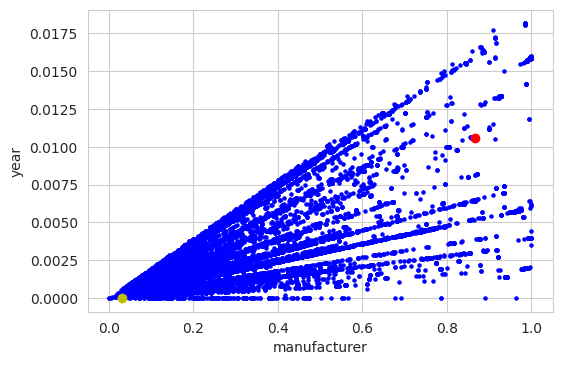

In [0]:
plt.scatter(dx, dy, s = 5, c = 'b')
plt.scatter(centroid1[0], centroid1[1], c='r')
plt.scatter(centroid2[0], centroid2[1], c='y')
# plt.scatter(centroid3[0], centroid3[1], c='black')
plt.xlabel('manufacturer')
plt.ylabel('year')

Text(0, 0.5, 'year')

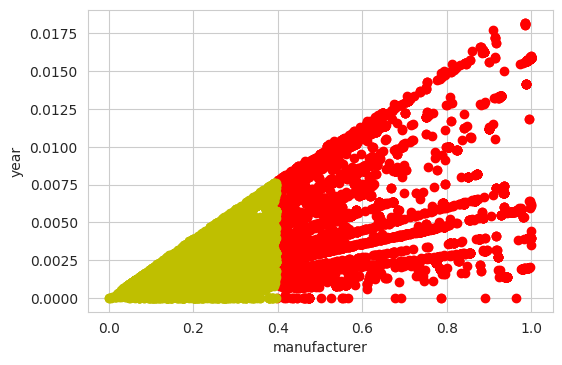

In [0]:
cek = False
while cek != True:
  # Proses menklusterkan
  #clusAr = kolomA RED, clusAy = kolomA YELLOW, 
  clusAr, clusAy = [], []
  clusBr, clusBy = [], []
  clusterfix = []
  for i in titik:
    # Menghitung jarak 2 titik dengan Euclidian Distance
    #jarak antara titik i dengan centroid pertama (red))
    hitung1 = math.sqrt((i[0] - centroid1[0])**2 + (i[1] - centroid1[1])**2)
    #jarak antara titik i dengan centroid kedua (yellow)
    hitung2 = math.sqrt((i[0] - centroid2[0])**2 + (i[1] - centroid2[1])**2)

    if min(hitung1, hitung2) == hitung1:
      # red
      clusAr.append(i[0])
      clusBr.append(i[1])
      clusterfix.append(1)
    elif min(hitung1, hitung2) == hitung2:
      # yellow
      clusAy.append(i[0])
      clusBy.append(i[1])
      clusterfix.append(2)
  #endfor

  # a,b,c untuk menyimpan centroid sebelumnya
  a = centroid1
  b = centroid2

  # Update centroid
  centroid1 = [sum(clusAr)/len(clusAr), sum(clusBr)/len(clusBr)]
  centroid2 = [sum(clusAy)/len(clusAy), sum(clusBy)/len(clusBy)]

  # Cek apakah centroid tetap atau berubah
  if (centroid1 == a) and (centroid2 == b):
      cek = True

#endwhile

plt.scatter(dx, dy, s = 10, c = 'b')
plt.scatter(clusAr, clusBr, c='r')
plt.scatter(clusAy, clusBy, c='y')
# plt.scatter(centroid1[0], centroid1[1], c='blue')
# plt.scatter(centroid2[0], centroid2[1], c='black')
plt.xlabel('manufacturer')
plt.ylabel('year')

In [0]:
clusterfix = pd.DataFrame(clusterfix, columns=['Cluster'] )

In [0]:
result = df.join(clusterfix)

In [0]:
result.to_csv('used_cars_clusterK2.csv')

### Evaluasi

In [0]:
# Menggunakan SSE
#centroid1 red
jumlah1 = 0
for i in range(len(clusAr)):
  jarakcentro = (clusAr[i]-centroid1[0])**2 + (clusBr[i]-centroid1[1])**2
  jumlah1 = jumlah1 + jarakcentro
print("centroid 1 =", jumlah1)
#centroid2 yellow
jumlah2 = 0
for i in range(len(clusAy)):
  jarakcentro = (clusAy[i]-centroid2[0])**2 + (clusBy[i]-centroid2[1])**2
  jumlah2 = jumlah2 + jarakcentro
print("centroid 2 =",jumlah2)
SSE = jumlah1 + jumlah2
print("SSE =", SSE)

centroid 1 = 158.46707526524975
centroid 2 = 135.75017170275672
SSE = 294.21724696800646


## Nilai K = 3

In [0]:
# Inisiasi nilai K
K = 3

Plot sebaran data

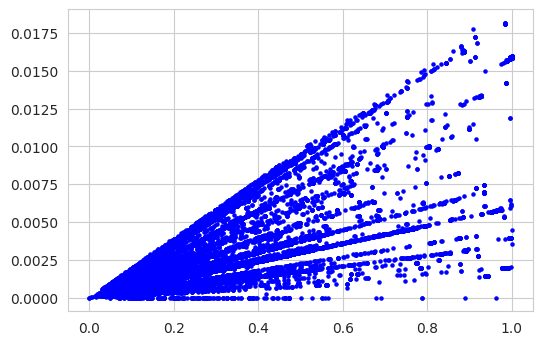

In [0]:
import matplotlib.pyplot as plt
plt.scatter(cluster[ : , 0], cluster[ :, 1], s = 5, c = 'b')
plt.show()

Buat centroid random

In [0]:
# Inisiasi kolom yang dipakai 
dx = cluster[ : , 0].tolist()
dy = cluster[ : , 1].tolist()

In [0]:
# Menggabungkan data kolom manufacture dan paint_color
titik = list(zip(dx, dy))

In [0]:
import random

In [0]:
def cekcentroid(centroid1,centroid2): 
  cobax = random.uniform(0,0.1)
  cobay = random.uniform(0,0.019)
  if (cobax!=centroid1[0]) and (cobay!=centroid1[1]) and (centroid2==0):
    centroid2 = [cobax,cobay]
    return centroid2
  elif(cobax!=centroid1[0]) and (cobay!=centroid1[1]) and (cobax!=centroid2[0]) and (cobay!=centroid2[1]):
    centroid3 = [cobax,cobay]
    return centroid3

In [0]:
cobax = random.uniform(0,0.1)
cobay = random.uniform(0,0.019)
centroid1 = [cobax,cobay]
centroid2 = cekcentroid(centroid1,0)
centroid3 = cekcentroid(centroid1,centroid2)
print(centroid1)
print(centroid2)
print(centroid3)

[0.0543118458668756, 0.011873539103135362]
[0.09189728102713142, 0.015009918963601052]
[0.041571689062153507, 0.005941897296874768]


Text(0, 0.5, 'paint_color')

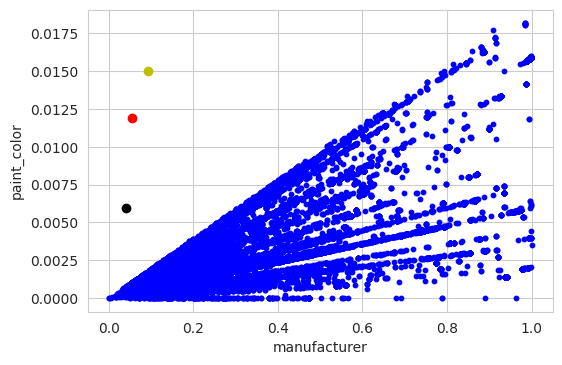

In [0]:
plt.scatter(dx, dy, s = 10, c = 'b')
plt.scatter(centroid1[0], centroid1[1], c='r')
plt.scatter(centroid2[0], centroid2[1], c='y')
plt.scatter(centroid3[0], centroid3[1], c='black')
plt.xlabel('manufacturer')
plt.ylabel('paint_color')

Perulangan untuk centroid dengan euclidian

Text(0, 0.5, 'paint_color')

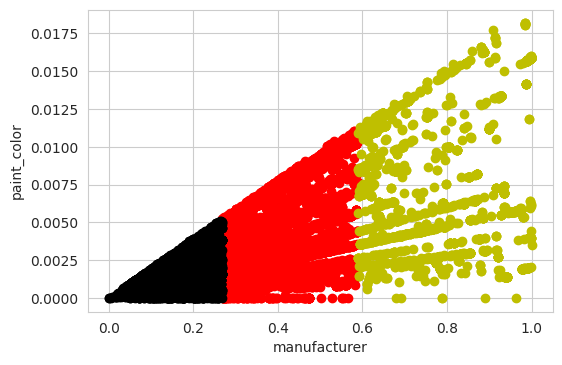

In [0]:
cek = False
while cek != True:
  clusterfix = []
  # Proses menklusterkan
  #clusAr = kolomA RED, clusAy = kolomA YELLOW, clusAb = kolomA BLACK
  clusAr, clusAy, clusAb = [], [], []
  clusBr, clusBy, clusBb = [], [], []
  for i in titik:
    # Menghitung jarak 2 titik dengan Euclidian Distance
    #jarak antara titik i dengan centroid pertama (red))
    hitung1 = math.sqrt((i[0] - centroid1[0])**2 + (i[1] - centroid1[1])**2)
    #jarak antara titik i dengan centroid kedua (yellow)
    hitung2 = math.sqrt((i[0] - centroid2[0])**2 + (i[1] - centroid2[1])**2)
    #jarak antara titik i dengan centroid ketiga (black)
    hitung3 = math.sqrt((i[0] - centroid3[0])**2 + (i[1] - centroid3[1])**2)

    if min(hitung1, hitung2, hitung3) == hitung1:
      # red titik
      clusAr.append(i[0])
      clusBr.append(i[1])
      # titik AB masuk diklaster 1
      clusterfix.append(1)
    elif min(hitung1, hitung2, hitung3) == hitung2:
      # yellow titik
      clusAy.append(i[0])
      clusBy.append(i[1])
      # titik AB masuk diklaster 2
      clusterfix.append(2)
    elif min(hitung1, hitung2, hitung3) == hitung3:
      # black titik
      clusAb.append(i[0])
      clusBb.append(i[1])
      # titik AB masuk diklaster 3
      clusterfix.append(3)
  #endfor

  # a,b,c untuk menyimpan centroid sebelumnya
  a = centroid1
  b = centroid2
  c = centroid3

  # Update centroid menghitung rata rata jarak di cluster tersebut
  centroid1 = [sum(clusAr)/len(clusAr), sum(clusBr)/len(clusBr)]
  centroid2 = [sum(clusAy)/len(clusAy), sum(clusBy)/len(clusBy)]
  centroid3 = [sum(clusAb)/len(clusAb), sum(clusBb)/len(clusBb)]

  # Cek apakah centroid tetap atau berubah
  if (centroid1 == a) and (centroid2 == b) and (centroid3 == c):
    cek = True

#endwhile

# plt.scatter(dx, dy, s = 10, c = 'b')
plt.scatter(clusAr, clusBr, c='r')
plt.scatter(clusAy, clusBy, c='y')
plt.scatter(clusAb, clusBb, c='black')
plt.xlabel('manufacturer')
plt.ylabel('paint_color')

In [0]:
print(len(clusterfix))

20001


In [0]:
clusterfix = pd.DataFrame(clusterfix, columns=['Cluster'] )

In [0]:
result = df.join(clusterfix)

In [0]:
result.to_csv('used_cars_clusterK3.csv')

### Evaluasi

In [0]:
# Menggunakan SSE
#centroid1 red
jumlah1 = 0
for i in range(len(clusAr)):
  jarakcentro = (clusAr[i]-centroid1[0])**2 + (clusBr[i]-centroid1[1])**2
  jumlah1 = jumlah1 + jarakcentro
print("centroid 1 =",jumlah1)
#centroid2 yellow
jumlah2 = 0
for i in range(len(clusAy)):
  jarakcentro = (clusAy[i]-centroid2[0])**2 + (clusBy[i]-centroid2[1])**2
  jumlah2 = jumlah2 + jarakcentro
print("centroid 2 =",jumlah2)
#centroid3 black
jumlah3 = 0
for i in range(len(clusAb)):
  jarakcentro = (clusAb[i]-centroid3[0])**2 + (clusBb[i]-centroid3[1])**2
  jumlah3 = jumlah3 + jarakcentro
print("centroid 3 =",jumlah3)
SSE = jumlah1 + jumlah2 + jumlah3
print("SSE =", SSE)

centroid 1 = 48.81695130383941
centroid 2 = 37.97306279277712
centroid 3 = 44.91210324494116
SSE = 131.70211734155768
